Libraries

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import streamlit as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


Load the clean data

In [59]:
df = pd.read_csv(r"C:\Users\hp\Documents\Countries Worldwide Info\cleaned_countriesdata.csv")
print(df.head())

      Country Continent      Area  Population Capital City
0        Togo    Africa   56785.0     8278737         Lomé
1     Mayotte    Africa     374.0      226915    Mamoudzou
2     Georgia      Asia   69700.0     3714000      Tbilisi
3     Vanuatu   Oceania   12189.0      307150    Port Vila
4  Kyrgyzstan      Asia  199951.0     6591600      Bishkek


Drop rows with missing/invalid data

In [60]:
df = df.dropna(subset=["Area", "Population"])

Define X(Feature) and Y(Target) and train-test split.

In [61]:
X = df[["Area"]] 
y = df["Population"]  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train Model

In [62]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Prediction

In [63]:
y_pred = model.predict(X_test)


Evaluate Model

In [64]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")

Mean Squared Error: 29808764744765464.00


In [65]:
print(f"R² Score: {r2:.2f}")

R² Score: 0.23


Plot

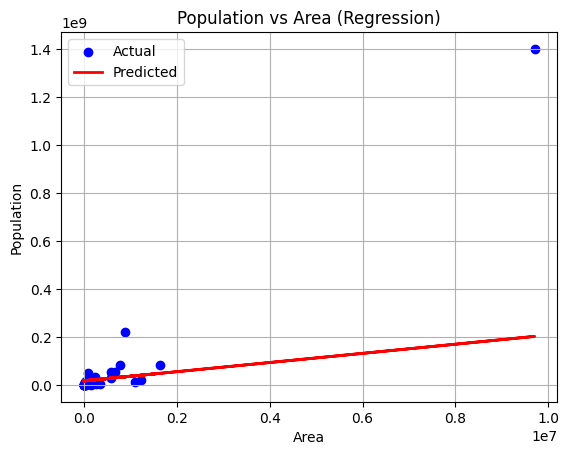

In [66]:
plt.scatter(X_test, y_test, color='blue', label="Actual")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Predicted")
plt.title("Population vs Area (Regression)")
plt.xlabel("Area")
plt.ylabel("Population")
plt.legend()
plt.grid(True)
plt.show()

In [67]:
!jupyter nbconvert --to script "ML_Model.ipynb"

[NbConvertApp] Converting notebook ML_Model.ipynb to script
[NbConvertApp] Writing 1443 bytes to ML_Model.py
